<a href="https://colab.research.google.com/github/yuraskass/lab1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [17]:
!pip install scikit-learn

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/world-data-2023.csv')
df

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [19]:
df_cleaned = df.dropna()

df_cleaned#Удаление

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,United Kingdom,281,GB,71.70%,"243,610","148,000",11.00,44.0,London,"379,025",...,14.80%,2.81,"66,834,405",62.80%,25.50%,30.60%,3.85%,"55,908,316",55.378051,-3.435973
186,United States,36,US,44.40%,"9,833,517","1,359,000",11.60,1.0,"Washington, D.C.","5,006,302",...,11.10%,2.61,"328,239,523",62.00%,9.60%,36.60%,14.70%,"270,663,028",37.090240,-95.712891
187,Uruguay,20,UY,82.60%,"176,215","22,000",13.86,598.0,Montevideo,"6,766",...,16.20%,5.05,"3,461,734",64.00%,20.10%,41.80%,8.73%,"3,303,394",-32.522779,-55.765835
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199


In [20]:
df_fileed_median = df.fillna(df.median())
df_fileed_median

<ipython-input-20-07a64f159a2b>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fileed_median = df.fillna(df.median())


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [21]:
df_filled_mean = df.fillna(df.mean())

df_filled_mean

<ipython-input-21-d5c7e4df689e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean = df.fillna(df.mean())


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [22]:
df_filled_mode = df.fillna(df["Abbreviation"].mode()[0])

df_filled_mode

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.93911,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.2,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,AD,7.2,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",AD,AD,AD,AD,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,AD,73.30%,8.80%,"25,162,368",6.42375,-66.58973
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,AD,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [23]:
df_interpolated = df.interpolate()

df_interpolated

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


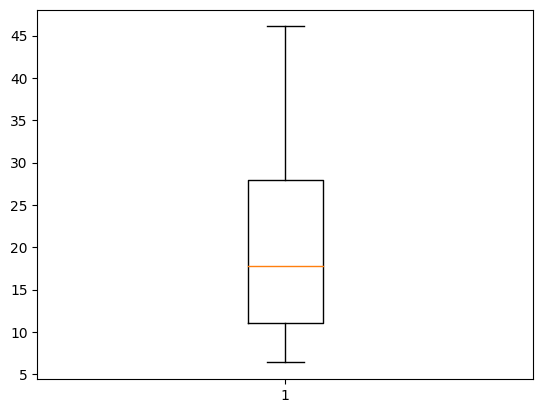

In [30]:
df = df.dropna()
plt.boxplot(df["Birth Rate"])
plt.show()

In [31]:

df["Birth Rate"].describe()

count    110.000000
mean      20.196455
std       10.039056
min        6.400000
25%       11.075000
50%       17.830000
75%       27.962500
max       46.080000
Name: Birth Rate, dtype: float64

In [32]:
mean = df["Birth Rate"].mean()
std_deviation = df["Birth Rate"].std()
threshold = 3 * std_deviation

# Идентифицируем выбросы
outliers = [x for x in df["Birth Rate"] if abs(x - mean) > threshold]

# Выводим результаты
print("Среднее значение данных:", mean)
print("Стандартное отклонение данных:", std_deviation)
print('Межквартальный размах:', df['Birth Rate'].quantile(0.75)-df['Birth Rate'].quantile(0.25))
print("Потенциальные выбросы:", outliers)


Среднее значение данных: 20.196454545454547
Стандартное отклонение данных: 10.039055804350777
Межквартальный размах: 16.8875
Потенциальные выбросы: []


на графике заметно отсутсвие выбросов с помощью сиредних вывели
Среднее значение данных: 20.196454545454547
Стандартное отклонение данных: 10.039055804350777
Межквартальный размах: 16.8875

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [33]:
df.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,20.196455,344.290909,2.672182,20.271818,72.671818,137.227273,1.919182,20.362677,22.532401
std,10.039056,341.231562,1.308142,18.453214,7.000788,201.171462,1.598116,24.432140,61.227878
min,6.400000,1.000000,0.980000,1.700000,54.300000,2.000000,0.010000,-40.900557,-106.346771
25%,11.075000,70.000000,1.682500,6.100000,67.625000,15.250000,0.467500,7.623255,-3.670908
50%,17.830000,239.500000,2.200000,13.600000,74.400000,41.000000,1.640000,21.033608,22.852793
75%,27.962500,420.750000,3.505000,31.500000,77.350000,176.000000,3.007500,40.124603,52.160266
max,46.080000,1876.000000,6.910000,78.500000,83.300000,1120.000000,7.120000,61.524010,178.065032


In [34]:
df = pd.concat((df, df.iloc[0:100]))
df.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,20.287857,351.495238,2.683619,20.504286,72.616667,139.857143,1.901238,20.407733,23.470963
std,10.017081,344.592600,1.308504,18.637713,7.028919,203.582833,1.598782,24.249274,61.144685
min,6.400000,1.000000,0.980000,1.700000,54.300000,2.000000,0.010000,-40.900557,-106.346771
25%,10.925000,70.000000,1.657500,6.100000,67.600000,13.500000,0.392500,7.623255,-3.670908
50%,17.950000,241.000000,2.220000,13.600000,74.400000,41.000000,1.580000,21.033608,22.852793
75%,28.250000,481.000000,3.510000,31.800000,77.200000,177.000000,3.010000,40.143105,55.403571
max,46.080000,1876.000000,6.910000,78.500000,83.300000,1120.000000,7.120000,61.524010,178.065032


In [35]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,United Kingdom,281,GB,71.70%,"243,610","148,000",11.00,44.0,London,"379,025",...,14.80%,2.81,"66,834,405",62.80%,25.50%,30.60%,3.85%,"55,908,316",55.378051,-3.435973
186,United States,36,US,44.40%,"9,833,517","1,359,000",11.60,1.0,"Washington, D.C.","5,006,302",...,11.10%,2.61,"328,239,523",62.00%,9.60%,36.60%,14.70%,"270,663,028",37.090240,-95.712891
187,Uruguay,20,UY,82.60%,"176,215","22,000",13.86,598.0,Montevideo,"6,766",...,16.20%,5.05,"3,461,734",64.00%,20.10%,41.80%,8.73%,"3,303,394",-32.522779,-55.765835
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199


In [36]:
df_no_duplicates.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,20.196455,344.290909,2.672182,20.271818,72.671818,137.227273,1.919182,20.362677,22.532401
std,10.039056,341.231562,1.308142,18.453214,7.000788,201.171462,1.598116,24.432140,61.227878
min,6.400000,1.000000,0.980000,1.700000,54.300000,2.000000,0.010000,-40.900557,-106.346771
25%,11.075000,70.000000,1.682500,6.100000,67.625000,15.250000,0.467500,7.623255,-3.670908
50%,17.830000,239.500000,2.200000,13.600000,74.400000,41.000000,1.640000,21.033608,22.852793
75%,27.962500,420.750000,3.505000,31.500000,77.350000,176.000000,3.007500,40.124603,52.160266
max,46.080000,1876.000000,6.910000,78.500000,83.300000,1120.000000,7.120000,61.524010,178.065032


In [37]:
num_features = df.select_dtypes(include=['int', 'float']).columns
num_features

Index(['Birth Rate', 'Calling Code', 'Fertility Rate', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio',
       'Physicians per thousand', 'Latitude', 'Longitude'],
      dtype='object')

In [38]:
num_features=num_features.drop('Calling Code')

In [41]:
from sklearn.preprocessing import MinMaxScaler
# MinMax масштабирование
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = scaler_minmax.fit_transform(df[num_features])
df_minmax_scaled['Fertility Rate'].unique()

array([0.58853288, 0.1079258 , 0.34401349, 0.76559865, 0.2158516 ,
       0.13153457, 0.12816189, 0.12647555, 0.17875211, 0.22428331,
       0.65092749, 0.31871838, 0.09780776, 0.70994941, 0.61888702,
       0.21753794, 0.60539629, 0.08768971, 0.11298482, 0.11973019,
       0.13996627, 0.12984823, 0.08263069, 0.83305228, 0.23102867,
       0.10286678, 0.30185497, 0.15177066, 0.50421585, 0.71500843,
       0.18212479, 0.48735245, 0.0623946 , 0.24957841, 0.09443508,
       0.20910624, 0.19561551, 0.45362563, 0.35581788, 0.16863406,
       0.30016863, 0.31365936, 0.4232715 , 0.18549747, 0.39123103,
       0.28499157, 0.10455312, 0.18718381, 0.10961214, 0.06576728,
       0.5227656 , 0.54468803, 0.17200675, 0.82630691, 0.04215852,
       0.07251265, 0.19392917, 0.04721754, 0.3237774 , 0.24283305,
       0.65261383, 0.19730185, 0.15851602, 0.12310287, 0.23946037,
       1.        , 0.74367622, 0.32209106, 0.42664418, 0.43507589,
       0.24451939, 0.21416526, 0.2698145 , 0.08094435, 0.06745

In [42]:
from sklearn.preprocessing import StandardScaler
# Standard масштабирование
scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_features] = scaler_std.fit_transform(df[num_features])
df_std_scaled['Fertility Rate'].unique()

array([ 1.36847066, -0.81479343,  0.25768718,  2.17283112, -0.32451658,
       -0.70754537, -0.72286652, -0.7305271 , -0.49304925, -0.2862137 ,
        1.65191197,  0.14277854, -0.86075688,  1.92003212,  1.50636103,
       -0.31685601,  1.44507642, -0.90672034, -0.7918117 , -0.7611694 ,
       -0.66924249, -0.71520595, -0.92970207,  2.47925415, -0.2555714 ,
       -0.83777516,  0.06617278, -0.61561846,  0.98544188,  1.94301385,
       -0.4777281 ,  0.90883612, -1.02162898, -0.17130507, -0.87607804,
       -0.35515888, -0.41644349,  0.7556246 ,  0.31131121, -0.5390127 ,
        0.05851221,  0.11979681,  0.61773424, -0.46240694,  0.4721833 ,
       -0.01043297, -0.83011458, -0.45474637, -0.80713285, -1.00630782,
        1.06970821,  1.16929569, -0.52369155,  2.44861185, -1.11355589,
       -0.97566552, -0.42410407, -1.09057416,  0.16576027, -0.20194737,
        1.65957254, -0.40878291, -0.58497616, -0.74584825, -0.21726852,
        3.23765115,  2.07324363,  0.15809969,  0.63305539,  0.67

## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [45]:
num_features = df.select_dtypes(include=['int', 'float']).columns
num_features

Index(['Birth Rate', 'Calling Code', 'Fertility Rate', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio',
       'Physicians per thousand', 'Latitude', 'Longitude'],
      dtype='object')

In [46]:
num_features=num_features.drop('Calling Code')

In [47]:
from sklearn.preprocessing import MinMaxScaler
# MinMax масштабирование
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = scaler_minmax.fit_transform(df[num_features])
df_minmax_scaled['Fertility Rate'].unique()

array([0.58853288, 0.1079258 , 0.34401349, 0.76559865, 0.2158516 ,
       0.13153457, 0.12816189, 0.12647555, 0.17875211, 0.22428331,
       0.65092749, 0.31871838, 0.09780776, 0.70994941, 0.61888702,
       0.21753794, 0.60539629, 0.08768971, 0.11298482, 0.11973019,
       0.13996627, 0.12984823, 0.08263069, 0.83305228, 0.23102867,
       0.10286678, 0.30185497, 0.15177066, 0.50421585, 0.71500843,
       0.18212479, 0.48735245, 0.0623946 , 0.24957841, 0.09443508,
       0.20910624, 0.19561551, 0.45362563, 0.35581788, 0.16863406,
       0.30016863, 0.31365936, 0.4232715 , 0.18549747, 0.39123103,
       0.28499157, 0.10455312, 0.18718381, 0.10961214, 0.06576728,
       0.5227656 , 0.54468803, 0.17200675, 0.82630691, 0.04215852,
       0.07251265, 0.19392917, 0.04721754, 0.3237774 , 0.24283305,
       0.65261383, 0.19730185, 0.15851602, 0.12310287, 0.23946037,
       1.        , 0.74367622, 0.32209106, 0.42664418, 0.43507589,
       0.24451939, 0.21416526, 0.2698145 , 0.08094435, 0.06745

In [48]:
from sklearn.preprocessing import StandardScaler
# Standard масштабирование
scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_features] = scaler_std.fit_transform(df[num_features])
df_std_scaled['Fertility Rate'].unique()

array([ 1.36847066, -0.81479343,  0.25768718,  2.17283112, -0.32451658,
       -0.70754537, -0.72286652, -0.7305271 , -0.49304925, -0.2862137 ,
        1.65191197,  0.14277854, -0.86075688,  1.92003212,  1.50636103,
       -0.31685601,  1.44507642, -0.90672034, -0.7918117 , -0.7611694 ,
       -0.66924249, -0.71520595, -0.92970207,  2.47925415, -0.2555714 ,
       -0.83777516,  0.06617278, -0.61561846,  0.98544188,  1.94301385,
       -0.4777281 ,  0.90883612, -1.02162898, -0.17130507, -0.87607804,
       -0.35515888, -0.41644349,  0.7556246 ,  0.31131121, -0.5390127 ,
        0.05851221,  0.11979681,  0.61773424, -0.46240694,  0.4721833 ,
       -0.01043297, -0.83011458, -0.45474637, -0.80713285, -1.00630782,
        1.06970821,  1.16929569, -0.52369155,  2.44861185, -1.11355589,
       -0.97566552, -0.42410407, -1.09057416,  0.16576027, -0.20194737,
        1.65957254, -0.40878291, -0.58497616, -0.74584825, -0.21726852,
        3.23765115,  2.07324363,  0.15809969,  0.63305539,  0.67

Масштабируйте категориальные признаки через OneHotEncoder

In [51]:
df_scaled = df.copy() # копируем df, чтобы по ссылке не изменять оригинальный
df_scaled['Fertility Rate'] = df_std_scaled['Fertility Rate']
df_scaled

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Tajikistan,68,TJ,34.10%,"144,100","17,000",30.76,992.0,Dushanbe,"5,310",...,63.10%,1.70,"9,321,018",42.00%,9.80%,67.30%,11.02%,"2,545,477",38.861034,71.276093
172,Tanzania,67,TZ,44.80%,"947,300","28,000",36.70,255.0,Dodoma,"11,973",...,26.10%,0.01,"58,005,463",83.40%,11.50%,43.80%,1.98%,"20,011,885",-6.369028,34.888822
173,Thailand,137,TH,43.30%,"513,120","455,000",10.34,66.0,Bangkok,"283,763",...,11.80%,0.81,"69,625,582",67.30%,14.90%,29.50%,0.75%,"35,294,600",15.870032,100.992541
174,East Timor,89,TL,25.60%,"14,874","2,000",29.42,670.0,Dili,495,...,10.20%,0.72,"3,500,000",67.30%,25.00%,17.30%,4.55%,"400,182",-8.874217,125.727539


In [52]:
df_minmax_scaled

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",0.657510,93.0,Kabul,"8,672",...,78.40%,0.037975,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",0.730681,0.611988
1,Albania,105,AL,43.10%,"28,748","9,000",0.135585,355.0,Tirana,"4,536",...,56.90%,0.167370,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",0.801115,0.444831
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",0.450605,213.0,Algiers,"150,006",...,28.10%,0.240506,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",0.673026,0.379754
4,Angola,26,AO,47.50%,"1,246,700","117,000",0.865171,244.0,Luanda,"34,693",...,33.40%,0.028129,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",0.289949,0.436763
6,Argentina,17,AR,54.30%,"2,780,400","105,000",0.267641,54.0,Buenos Aires,"201,348",...,17.60%,0.555556,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",0.024256,0.150240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Tajikistan,68,TJ,34.10%,"144,100","17,000",0.613911,992.0,Dushanbe,"5,310",...,63.10%,0.237693,"9,321,018",42.00%,9.80%,67.30%,11.02%,"2,545,477",0.778735,0.624527
172,Tanzania,67,TZ,44.80%,"947,300","28,000",0.763609,255.0,Dodoma,"11,973",...,26.10%,0.000000,"58,005,463",83.40%,11.50%,43.80%,1.98%,"20,011,885",0.337141,0.496588
173,Thailand,137,TH,43.30%,"513,120","455,000",0.099294,66.0,Bangkok,"283,763",...,11.80%,0.112518,"69,625,582",67.30%,14.90%,29.50%,0.75%,"35,294,600",0.554267,0.729011
174,East Timor,89,TL,25.60%,"14,874","2,000",0.580141,670.0,Dili,495,...,10.20%,0.099859,"3,500,000",67.30%,25.00%,17.30%,4.55%,"400,182",0.312682,0.815980


In [53]:
df["Country"] = df["Country"].astype("category")
df["Abbreviation"] = df["Abbreviation"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 175
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Country                                    210 non-null    category
 1   Density
(P/Km2)                            210 non-null    object  
 2   Abbreviation                               210 non-null    category
 3   Agricultural Land( %)                      210 non-null    object  
 4   Land Area(Km2)                             210 non-null    object  
 5   Armed Forces size                          210 non-null    object  
 6   Birth Rate                                 210 non-null    float64 
 7   Calling Code                               210 non-null    float64 
 8   Capital/Major City                         210 non-null    object  
 9   Co2-Emissions                              210 non-null    object  
 10  CPI           

In [54]:

from sklearn.preprocessing import OneHotEncoder
cat_features = df.select_dtypes(include=['category']).columns
df_cat_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[cat_features])

# Получаем имена новых признаков
encoded_columns = encoder.get_feature_names_out(cat_features)
encoded_columns
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns) # получаем датафрейм с закодированными признаками
df_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Azerbaijan,Country_Bangladesh,Country_Barbados,Country_Belgium,...,Abbreviation_TN,Abbreviation_TR,Abbreviation_TT,Abbreviation_TZ,Abbreviation_UA,Abbreviation_UG,Abbreviation_US,Abbreviation_UY,Abbreviation_VN,Abbreviation_ZM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns, index=df.index)

df_copy = df.copy()
df_copy = pd.concat([df_copy, df_encoded], axis=1)

# Удаление исходных категориальных признаков
df_copy = df_copy.drop(columns=cat_features)
df_copy

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),...,Abbreviation_TN,Abbreviation_TR,Abbreviation_TT,Abbreviation_TZ,Abbreviation_UA,Abbreviation_UG,Abbreviation_US,Abbreviation_UY,Abbreviation_VN,Abbreviation_ZM
0,60,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,105,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",232.75,53.50%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,68,34.10%,"144,100","17,000",30.76,992.0,Dushanbe,"5,310",148.57,6.00%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,67,44.80%,"947,300","28,000",36.70,255.0,Dodoma,"11,973",187.43,3.50%,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
173,137,43.30%,"513,120","455,000",10.34,66.0,Bangkok,"283,763",113.27,0.70%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,89,25.60%,"14,874","2,000",29.42,670.0,Dili,495,145.38,2.60%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])